In [16]:
from data_utils import generate_P_h_given_h, \
    generate_P_m_given_h, generate_dataset_pickle, HM_Dataset
import matplotlib.pyplot as plt

In [8]:
h_size = 32
m_size = 64
seq_len = 128
num_samples_train = 500

In [9]:
# Step 1: Generate transition matrices
h_token_ids, T_h = generate_P_h_given_h(diagonal_probability=0.6, h_size=h_size, seed=42)
P_m_h, m_token_ids = generate_P_m_given_h(num_peaks=2, peaks_probability=0.9,
                                          m_size=m_size, h_token_ids=h_token_ids, seed=42)

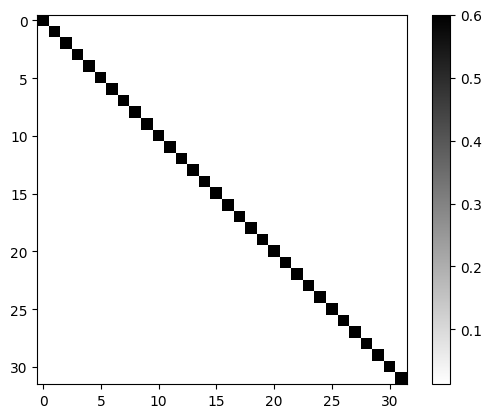

In [21]:
plt.imshow(T_h, cmap='gray_r')
plt.colorbar()

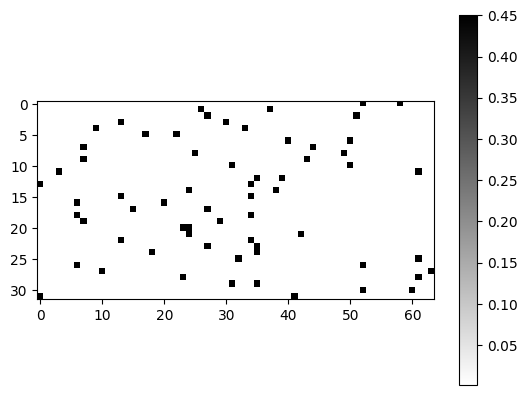

In [20]:
plt.imshow(P_m_h, cmap='gray_r')
plt.colorbar()

In [10]:
print(h_token_ids)
print(m_token_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [11]:
print(T_h.shape)
print(P_m_h.shape)

(32, 32)
(32, 64)


In [12]:
# Step 2: Generate dataset pickle
generate_dataset_pickle("data/train.pkl", num_samples=num_samples_train, 
                        h_token_ids=h_token_ids, m_token_ids=m_token_ids, 
                        T_h=T_h, P_m_h=P_m_h, seq_len=seq_len)

100%|██████████| 500/500 [00:03<00:00, 159.34it/s]


Saved 500 samples to data/train.pkl


In [13]:
# Step 3: Load as PyTorch Dataset
train_dataset = HM_Dataset("data/train.pkl")
d = train_dataset[0]
h_seq = d['h_seq']
m_seq = d['m_seq']
print(h_seq.shape, m_seq.shape)
print(train_dataset.m_vocab_size)
print(train_dataset.h_vocab_size)
print(train_dataset.seq_len)
print(train_dataset.mask_token_id)

torch.Size([128]) torch.Size([128])
64
33
128
32


In [14]:
print(h_seq)
print(m_seq)

tensor([11, 11, 11, 19, 18, 18, 18, 18, 18, 18, 18, 18,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5, 20,  0,  0,  0,  0,  0,  0, 22, 22, 22, 22, 22, 11,
        11, 11, 28, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21,  2, 30,  9,
         9,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,  7,  1,  1, 29, 29, 19, 19,
        19, 19,  9,  9,  9, 27, 27, 12, 12, 12, 12, 12, 29, 19, 19, 30, 29,  1,
         1, 18, 21, 21,  8, 16, 25, 25, 27, 27, 27, 27, 27, 12, 12, 12, 21, 31,
        31,  7,  7,  7,  7, 13, 26, 26, 26, 26, 24, 24, 24, 23, 23, 23, 23, 23,
        23, 23])
tensor([61, 61, 60,  7,  6, 34,  6, 34, 34, 32, 34, 34, 22, 22, 22, 17, 17, 22,
        17, 17, 17, 22, 22, 24, 52, 58, 52, 58, 44, 58, 34, 13, 13, 19, 13,  3,
        61, 46, 61, 29, 29, 29,  7, 29,  7, 49, 29, 29, 24, 42, 42, 27, 52, 43,
         7, 33,  9,  9, 33,  9, 33,  9,  1, 44, 41, 44, 37, 37, 31, 31, 29, 29,
        29,  7,  7, 43, 43, 63, 63, 39, 35, 35, 35, 35, 35, 15, 29, 52, 31, 26,
        26, 34, 24, 42,